In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [2]:
import pandas as pd
import numpy as np
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Разделяем выборку на трейн и тест. Строим модель логистической регрессии

In [4]:
#import algorithm
from sklearn.linear_model import Ridge

#3. fit the model to the training data
from sklearn.model_selection import train_test_split

#setup random seed
np.random.seed(42)

#create the data
X = housing_df.drop("target", axis =1)
y = housing_df["target"] # median house price in $100, 000s

#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model(on the training set)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

Вычесляем метрики

In [5]:
model_train1 = LinearRegression()
y_pred = model_train1.fit(X_train, y_train).predict(X_train)


In [6]:
rmse_train1 = mean_squared_error(y_train, y_pred)**0.5
print(rmse_train1)

0.7196757085831575


In [7]:
model_test1 = LinearRegression()
y_pred_test = model_test1.fit(X_test, y_test).predict(X_test)

rmse_test1 = mean_squared_error(y_test, y_pred_test)**0.5
print(rmse_test1)

0.7275531683603939


In [8]:
r2_train1 = r2_score(y_train, y_pred)
print(r2_train1)

0.6125511913966952


In [9]:
r2_test1 = r2_score(y_test, y_pred_test)
print(r2_test1)

0.596054650433006


Метрики получильсь похожими, значит модель работает.

Посмотрим, как распределена целевая переменная на примере "ящика с усами".

In [10]:
def get_boxplot(X, columns=[]):
  for i in columns:
    sns.boxplot(x=X[i])
  pass  

def get_pairplot(X, columns=None):
  if columns is None:
    columns = list(X.columns)
  sns.pairplot(X[columns])
  pass    

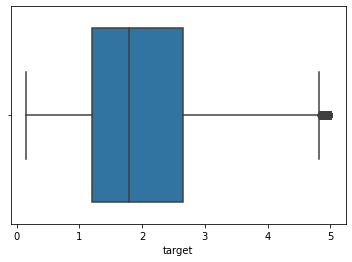

In [11]:
get_boxplot(housing_df, columns = ['target'])

In [12]:
housing_df['target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: target, dtype: float64

Как видим большенство значений лежит в диапозоне от 1 до 2,7. Присутствуют значения, приближенные к 5. Их можно посчитать выбросавмми

Построим корелляционную матрицу.

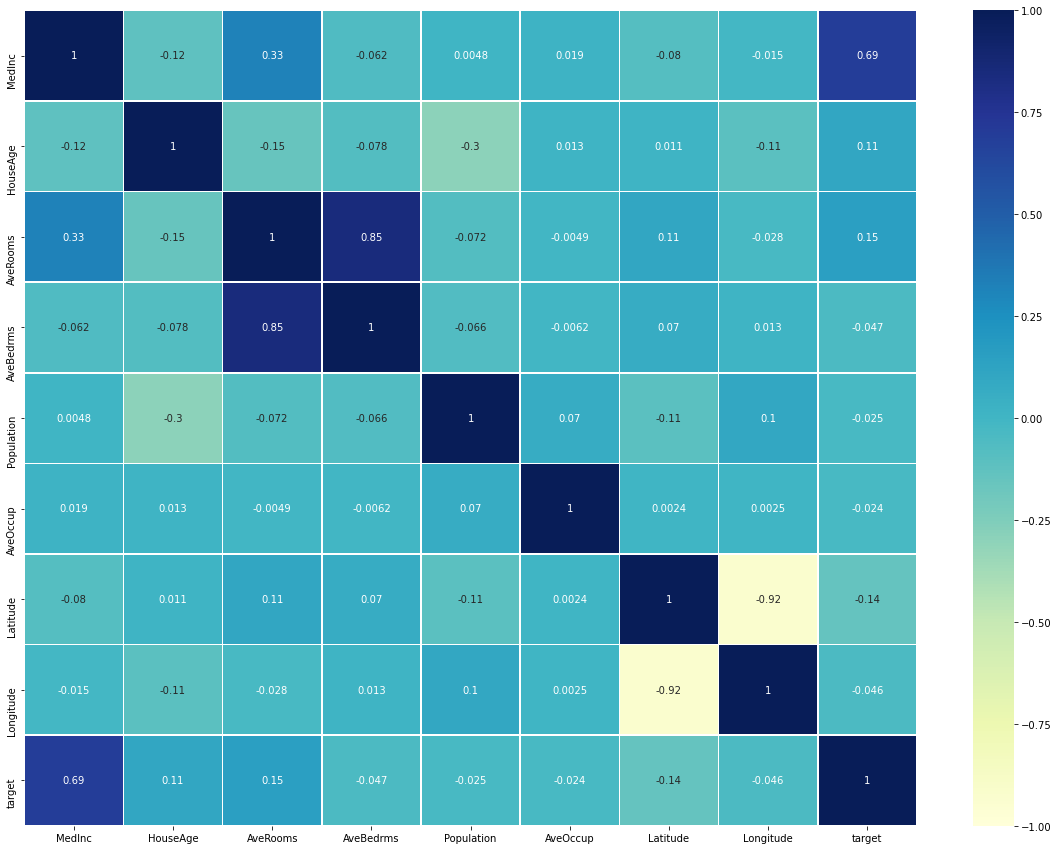

In [13]:
plt.rcParams['figure.figsize']=(20,15)
sns.heatmap(housing_df.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

Из матрицы видим, что средне количество комнат сильно коррелирует со средним количеством спален, что логично.\
Удалим из датасета спальни и посчитаем метрики снова

In [14]:
housing_df_1 = housing_df.drop(['AveBedrms'], inplace=True, axis=1)

In [15]:
housing_df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


In [16]:

np.random.seed(42)


X = housing_df.drop("target", axis =1)
y = housing_df["target"]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train2, y_train2)



LinearRegression()

In [17]:
model_train2 = LinearRegression()
y_pred2 = model_train2.fit(X_train2, y_train2).predict(X_train2)
r2_train2 = r2_score(y_train2, y_pred2)
print(r2_train2)

0.599523850205593


In [18]:
rmse_train2 = mean_squared_error(y_train2, y_pred2)**0.5
print(rmse_train2)

0.7316746485880744


In [19]:
model_test2 = LinearRegression()
y_pred_test2 = model_test2.fit(X_test2, y_test2).predict(X_test2)

rmse_test2 = mean_squared_error(y_test2, y_pred_test2)**0.5
print(rmse_test2)

0.7311499337223037


In [20]:
r2_test2 = r2_score(y_test2, y_pred_test2)
print(r2_test2)

0.5920508524752688


Удалось немного улучшить качество модели

Теперь удалим значения, которые мы посчитали выбросами.

In [21]:
housing_df_2 = housing_df[housing_df["target"] < 4]

In [22]:
housing_df_2 = housing_df[housing_df["target"] > 2]

In [23]:
housing_df_2.drop(columns = ['target']), housing_df_2['target']

(       MedInc  HouseAge  AveRooms  Population  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127       322.0  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137      2401.0  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136       496.0  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352       558.0  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853       565.0  2.181467     37.85    -122.25
 ...       ...       ...       ...         ...       ...       ...        ...
 20545  3.7452      26.0  5.113951      2199.0  2.341853     38.55    -121.75
 20565  2.4167      22.0  5.938865       808.0  3.528384     38.65    -121.70
 20566  4.3487      29.0  5.930712      1554.0  2.910112     38.65    -121.84
 20573  5.6790      20.0  6.401274       457.0  2.910828     38.56    -122.05
 20578  2.8542      37.0  5.253731       238.0  3.552239     38.84    -121.81
 
 [8709 rows x 7 columns],
 0        4.526
 1        3.585
 2  

In [24]:
from sklearn.linear_model import Ridge


from sklearn.model_selection import train_test_split


np.random.seed(42)

X = housing_df_2.drop("target", axis =1)
y = housing_df_2["target"]


X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train3, y_train3)


LinearRegression()

In [25]:
model_train3 = LinearRegression()
y_pred3 = model_train3.fit(X_train3, y_train3).predict(X_train3)
r2_train3 = r2_score(y_train3, y_pred3)
print(r2_train3)

0.3465018761049212


In [26]:
rmse_train3 = mean_squared_error(y_train3, y_pred3)**0.5
print(rmse_train3)

0.7646773945930037


In [29]:
model_test3 = LinearRegression()
y_pred_test3 = model_test3.fit(X_test3, y_test3).predict(X_test3)

rmse_test3 = mean_squared_error(y_test3, y_pred_test3)**0.5
print(rmse_test3)

0.717351267925485


In [30]:
r2_test3 = r2_score(y_test3, y_pred_test3)
print(r2_test3)

0.42710687082137877


Качество модели ухудшилось. Нужно искать другие варианты.

In [31]:
m = ['m1', 'm2', 'm3']

r2_train = [r2_train1, r2_train2, r2_train3] 
r2_test = [r2_test1, r2_test2, r2_test3] 

rmse_train = [rmse_train1, rmse_train2, rmse_train3] 
rmse_test = [rmse_test1, rmse_test2, rmse_test3] 



data = pd.DataFrame({'model#': m, 
                     'r2_train': r2_train, 'r2_test': r2_test,
                     'rmse_train': rmse_train, 'rmse_test': rmse_test,
                    }                                      
                   )
data.head(3)

,model#,r2_train,r2_test,rmse_train,rmse_test
0,m1,0.612551,0.596055,0.719676,0.727553
1,m2,0.599524,0.592051,0.731675,0.731150
2,m3,0.346502,0.427107,0.764677,0.717351
